In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer, QuantileTransformer

In [47]:
#Gernerating a dataset with 1000 rows and 1 column
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns=['value'])

#Checking the number of rows and columns and rows in the dataset
column_count = df.shape[1]
row_count = df.shape[0]
print(f'Column count: {column_count}')
print(f'Row count: {row_count}')

df.head()

Column count: 1
Row count: 1000


,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='value', ylabel='Count'>

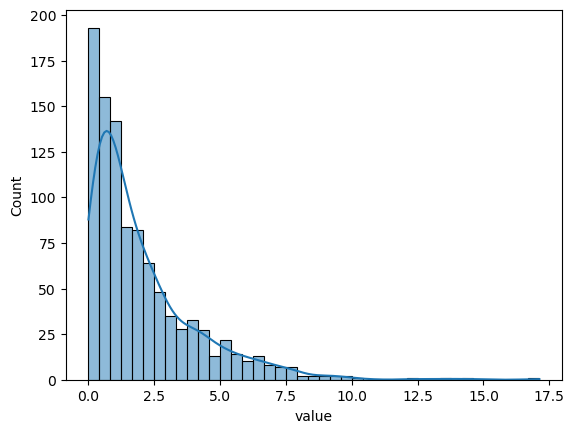

In [42]:
sns.histplot(df, x='value', kde=True)

In [43]:
# normalizing the data using min-max scaling
scaler = MinMaxScaler()
df['value_normalized'] = scaler.fit_transform(df)
df.head()

,value,value_normalized
0,1.591749,0.092907
1,2.511862,0.146649
2,1.846446,0.107783
3,1.574402,0.091894
4,1.102097,0.064307


In [44]:
# normalizing the data using power transformer

pt_box_cox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt  = QuantileTransformer(output_distribution='normal')
# using box cox methon in the power transformer
df["box_cox"] = pt_box_cox.fit_transform(df[['value']])
#using yeo-johnson method in the power transformer
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['value']])
df['Quantile'] = qt.fit_transform(df[['value']])

df.head()

,value,value_normalized,box_cox,yeo_johnson,Quantile
0,1.591749,0.092907,0.158969,0.179335,0.162552
1,2.511862,0.146649,0.602906,0.677331,0.587964
2,1.846446,0.107783,0.298068,0.339698,0.286135
3,1.574402,0.091894,0.148897,0.167607,0.157469
4,1.102097,0.064307,-0.164776,-0.202107,-0.154930


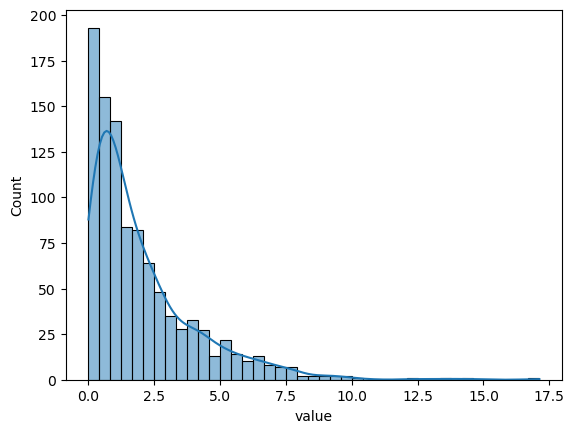

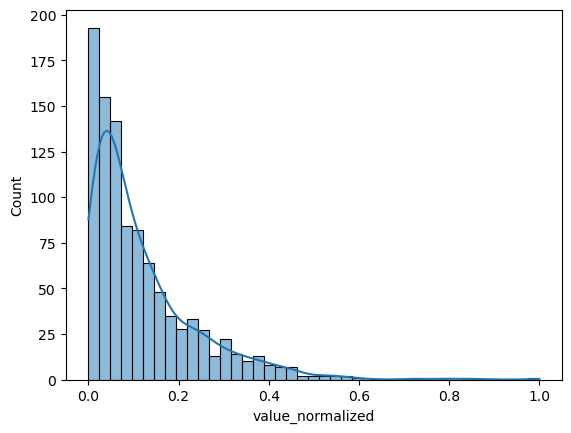

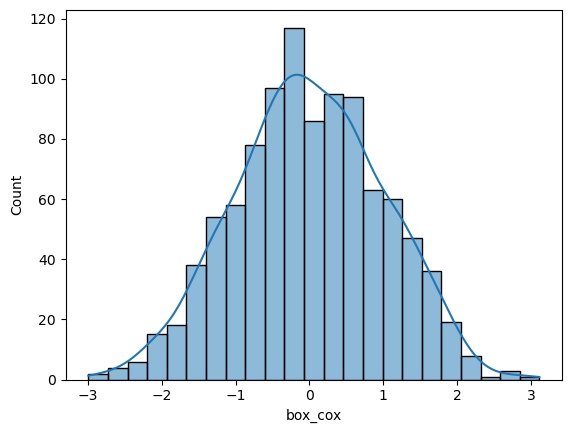

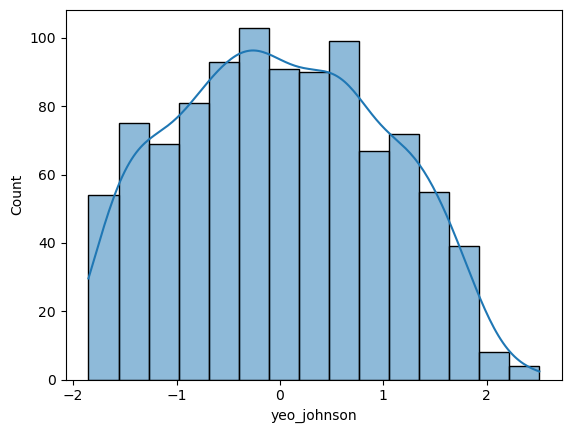

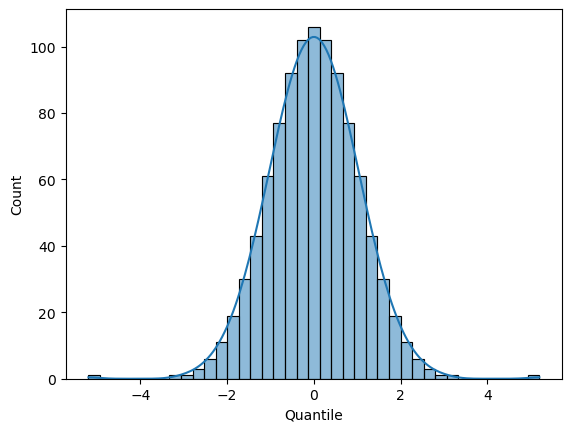

In [45]:
# creating histogram of the data when the technique box cox is used
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()